# Census Data

1. Data Exploartion
2. Data Preprocessing
3. Applying ML Algorithms
4. Hyper parameter optimization

In [3]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,\
                            recall_score,f1_score,confusion_matrix
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import confusion_matrix

In [7]:
# read the data set either by local path or github raw data link
data = pd.read_csv('data/adult.csv')
# Display the top five rows
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Understand the data

In [8]:
# observe the names of the columns
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [11]:
# How many instances are there?
data.shape[0]

48842

In [12]:
# Target is income column
# check the no of classes in the income column
data.income.nunique()

2

In [13]:
# observe the class distribution
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [14]:
# Class distribution wrt total no of entries
data.income.value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [15]:
# column wise missing value count
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
# values with unknown category
(data=='?').sum()

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [17]:
# Seperate Features and target
features = data.drop('income',axis=1)
target = data['income']

#### Numerical data analysis

In [18]:
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Add a new row for the previous output. 
# With label range and values are max-min of that column

In [24]:
num_desc = features.describe()
num_desc.loc['range'] = num_desc.loc['max'] - \
                         num_desc.loc['min']
num_desc

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
range,73.000000,1.478115e+06,15.000000,99999.000000,4356.000000,98.000000


In [26]:
# Column count of each data type
# Non null objects in each column
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019147A5A988>,
      dtype=object)

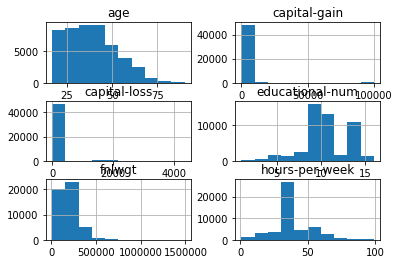

In [27]:
# observe histgorams using pandas
features.hist()

Text(0, 0.5, 'frequency')

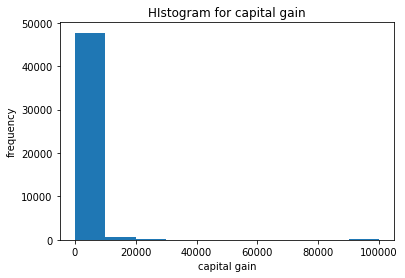

In [42]:
# capiatl gain and capital loss features skewness is high
# these two features are positively skewed
# Plot them using matplotlib
bin_values = plt.hist(features['capital-gain'])
plt.title('HIstogram for capital gain')
plt.xlabel('capital gain')
plt.ylabel('frequency')
#plt.xticks(bin_values[1])
#plt.yticks(bin_values[0])

Text(0, 0.5, 'frequency')

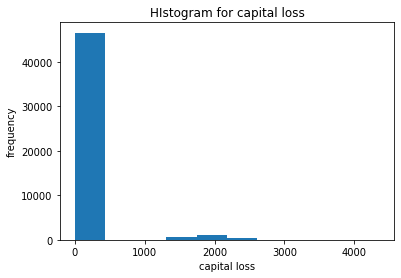

In [45]:
plt.hist(features['capital-loss'])
plt.title('HIstogram for capital loss')
plt.xlabel('capital loss')
plt.ylabel('frequency')

Apply logarithemic for the skewed columns

In [46]:
features['capital-gain'] = np.log1p(\
                    features['capital-gain'])
features['capital-loss'] = np.log1p(\
                    features['capital-loss'])

Text(0, 0.5, 'frequency')

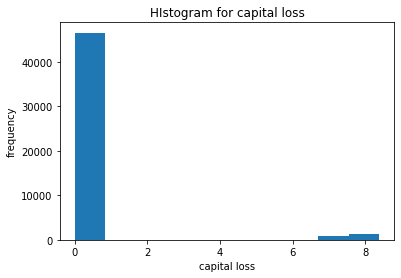

In [47]:
plt.hist(features['capital-loss'])
plt.title('HIstogram for capital loss')
plt.xlabel('capital loss')
plt.ylabel('frequency')

In [48]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

#### Apply scaling for all the numerical columns

In [52]:
num_cols  = features.columns[features.dtypes != object]
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [54]:
# Use MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
# create an instance of the scaler
sc = MinMaxScaler()
# Fit and transofrm the numerical data
features[num_cols] = sc.fit_transform(features[num_cols])

In [55]:
# After scaling observe the stats
features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.120004,0.605206,0.063281,0.041885,0.402269
std,0.187815,0.071445,0.171398,0.212412,0.189298,0.126443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071216,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112210,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152462,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019149F23748>,
      dtype=object)

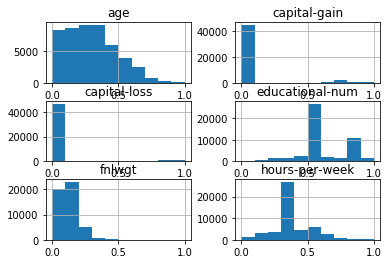

In [57]:
# After scaling observe the hist
features.hist()

#### Categorical columns preprocessing

In [58]:
cat_cols = features.columns [features.dtypes==object]
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [59]:
# Check the number of unique values in 
# each categorical column
features[cat_cols].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
dtype: int64

In [60]:
# Total unique value count in cat columns
features[cat_cols].nunique().sum()

102

After applying one hot encoding or pd.get_dummies. They will generate 102 new columns. which will added in the output data frame.

In [62]:
#Total no of columns in the final Df is
features.shape[1] + features[cat_cols].nunique().sum() -\
                len(cat_cols)

108

In [63]:
# Create dummy columns and update the features
features = pd.get_dummies(features)

In [64]:
# Check the no of rows and columns
features.shape

(48842, 108)

In [65]:
features.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=108)

In [66]:
data.gender[:5]

0      Male
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [68]:
features[['gender_Male','gender_Female']][:5]

,gender_Male,gender_Female
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [75]:
features.iloc[:,31:38]

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0
48838,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,1
48840,0,0,0,0,1,0,0


##### convert the target in to binary

In [76]:
target.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [77]:
target.apply(lambda x:0 if x=='<=50K' else 1)

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [80]:
(target.apply(lambda x:0 if x=='<=50K' else 1)).\
                        value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [81]:
target = target.apply(lambda x:0 if x=='<=50K' else 1)
target.value_counts()

0    37155
1    11687
Name: income, dtype: int64

Split the data set into two parts 80% for training and 20% for testing

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split\
        (features,target,test_size=0.2,random_state=23)

In [86]:
# Check the class distribution in train data
y_train.value_counts(normalize=True)

0    0.758708
1    0.241292
Name: income, dtype: float64

In [87]:
# Check the class distribution in test data
y_test.value_counts(normalize=True)

0    0.768758
1    0.231242
Name: income, dtype: float64

#### Apply GaussianNB

In [88]:
# import the classifier
from sklearn.naive_bayes import GaussianNB
# create an instance of the classifier
nb = GaussianNB()
# Train the model with training data
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
# Predict the class for test data
from sklearn.metrics import f1_score
y_pred = nb.predict(x_test)
f1_score(y_pred,y_test)

0.5195453977769452

#### Apply KNeighborClassifier

In [91]:
# import the classifier
from sklearn.neighbors import KNeighborsClassifier
# create an instance of the classifier
knn = KNeighborsClassifier()
# Train the model with training data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
# Predict the class for test data
y_pred = knn.predict(x_test)
f1_score(y_pred,y_test)

0.6072985999540967

####  Apply SGDC

In [93]:
# import the classifier
from sklearn.linear_model import SGDClassifier
# create an instance of the classifier
sgdc = SGDClassifier()
# Train the model with training data
sgdc.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
# Predict the class for test data
y_pred = sgdc.predict(x_test)
f1_score(y_pred,y_test)

0.5893195988072648

#### Apply Logistic Regression

In [95]:
# import the classifier
from sklearn.linear_model import LogisticRegression
# create an instance of the classifier
lr = LogisticRegression()
# Train the model with training data
lr.fit(x_train,y_train)

C:\Users\Krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# Predict the class for test data
y_pred = lr.predict(x_test)
f1_score(y_pred,y_test)

0.6433734939759036

Tasks
1. Apply all the above algorithms for scaled numerical features
2. Apply all the above algorithms forcategorical features
3. Convert all the categorical columns using Label Encoder and create a dataframe. Apply suitable Naivebayes Algorithm.
4. Compare all the algorithms output